In [ ]:
!pip install yahoo_fin
!pip install yoptions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=06fbe41b086f1efbc67571cad410bc7098083e339740dbc0b98302698b82236f
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=08ee6300fda2c71102575a906c6787b6444141bbc1c503667a0afdbd06cef9b7
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existi

In [ ]:
import numpy as np
import pandas as pd
import os
import datetime
from datetime import datetime
from pandas_datareader import data
from functools import reduce
import yoptions as yo
from yahoo_fin import options
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tabulate import tabulate

for dirname, _, filenames in os.walk('3mfanddo.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
today = datetime.now()
year_ago = datetime(today.year-3, today.month, today.day) # get three years period of time

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd
from functools import reduce

today = dt.datetime.now()
year_ago = dt.datetime(today.year - 3, today.month, today.day)  # get three years period of time

tickers = ['GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT']

dfs = []

for ticker in tickers:
    try:
        temp = yf.download(ticker, start=year_ago, end=today)

        # Convert 'Adj Close' column from float to integer
        temp['Adj Close'] = temp['Adj Close'].astype(int)

        temp_new = temp[['Adj Close']]
        temp_new.columns = [ticker]
        dfs.append(temp_new)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Check if any data was fetched
if not dfs:
    print("No data fetched for any ticker.")
else:
    # Merge the dataframes
    stocks = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

    # Save the merged DataFrame to a CSV file
    csv_filename = 'stock_data.csv'
    stocks.to_csv(csv_filename)

    print(f'Merged data saved to {csv_filename}')
    print(stocks.shape)
    print(stocks.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Merged data saved to stock_data.csv
(754, 8)
            GOOG  AMZN  AMD  META  INTC  AAPL  NVDA  MSFT
Date                                                     
2020-10-22    80   158   79   278    49   113   133   209
2020-10-23    82   160   81   284    43   112   135   210
2020-10-26    79   160   82   277    42   113   131   204
2020-10-27    80   164   78   283    41   114   133   207
2020-10-28    75   158   76   267    40   109   125   1

In [ ]:
chain = yo.get_chain_greeks(stock_ticker='AMD', dividend_yield=0, option_type='c', risk_free_rate=0)
chain.head()

,Symbol,Strike,Last Price,Bid,Ask,Impl. Volatility,Delta,Gamma,Theta,Vega,Rho
0,AMD231027C00040000,40.0,64.35,61.15,62.35,4.167974,0.9908,0.0006,-0.1370,0.0026,0.0043
1,AMD231027C00045000,45.0,66.03,56.50,57.35,2.875003,0.9979,0.0002,-0.0253,0.0007,0.0049
2,AMD231027C00060000,60.0,43.30,41.70,42.55,2.277348,0.9903,0.0011,-0.0789,0.0028,0.0065
3,AMD231027C00070000,70.0,31.96,31.75,32.15,1.472659,0.9939,0.0011,-0.0338,0.0018,0.0076
4,AMD231027C00075000,75.0,26.90,26.75,27.15,1.234379,0.9924,0.0016,-0.0343,0.0022,0.0081


In [ ]:
options_call, options_put = {}, {}
drop_ticker = []
params = ['Strike', 'Last Price', 'Bid', 'Ask', 'Impl. Volatility', 'Delta', 'Gamma', 'Theta', 'Vega', 'Rho']

# download call and put options with greeks parameters
for ticker in tickers:
    try:
        call = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='c', risk_free_rate=0)[params]
        put = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='p', risk_free_rate=0)[params]

        options_call[ticker] = call
        options_put[ticker] = put
    except ValueError:
        drop_ticker.append(ticker)

In [ ]:
stocks.drop(drop_ticker, axis=1, inplace=True)
for tick in drop_ticker:
    tickers.remove(tick) # remove stocks without data options


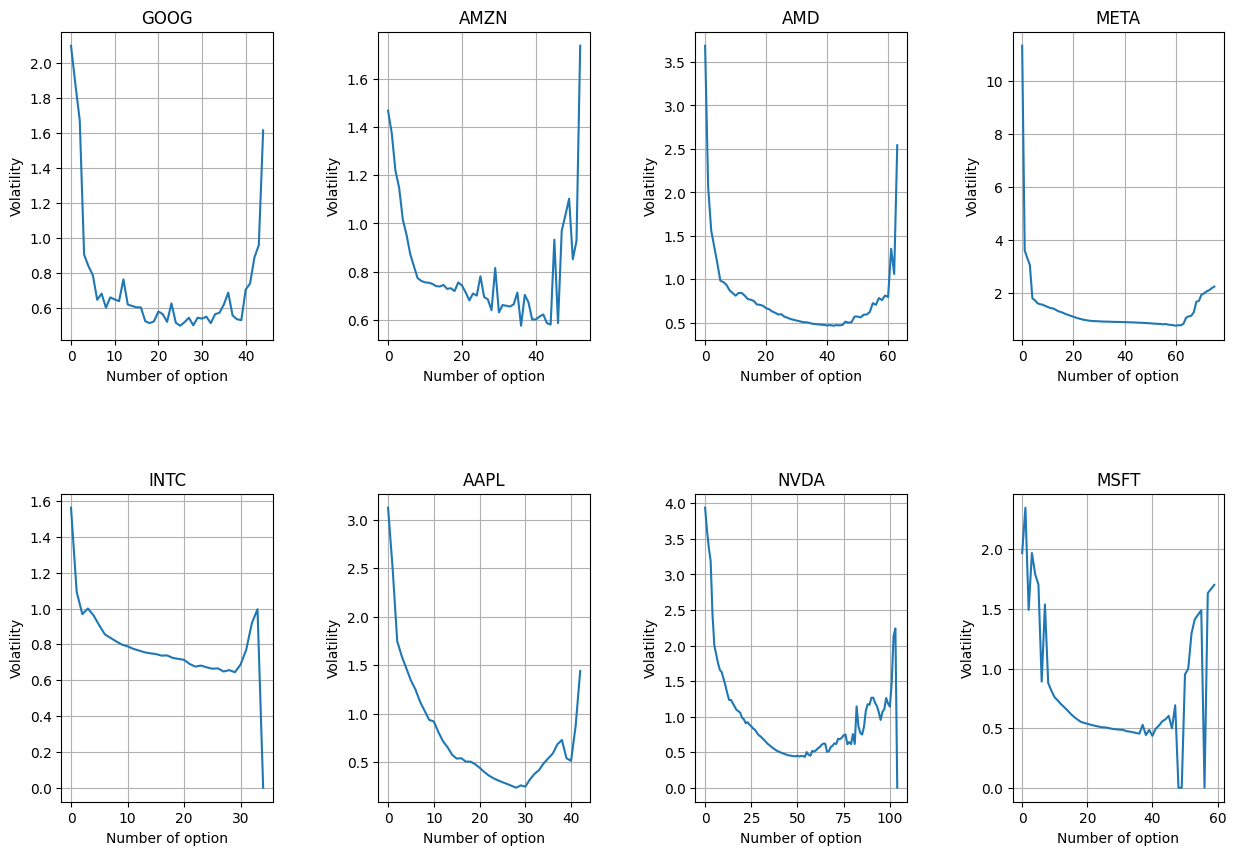

In [ ]:
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 4

# creatingsubplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterating tickers and creatingsubplots
for idx, tick in enumerate(tickers):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    ax.set_title(tick)
    ax.set_ylabel('Volatility')
    ax.set_xlabel('Number of option')
    ax.grid(True)
    ax.plot(range(options_put[tick]['Impl. Volatility'].shape[0]), options_put[tick]['Impl. Volatility'])

# remove empty subplots
for idx in range(len(tickers), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=4, subplot_titles=tickers, shared_xaxes=True, shared_yaxes=True)

for i, tick in enumerate(tickers, 1):
    row = (i - 1) // 4 + 1
    col = (i - 1) % 4 + 1

    x_values = list(range(options_put[tick]['Impl. Volatility'].shape[0]))

    fig.add_trace(
        go.Scatter(
            x=x_values,
            y=options_put[tick]['Impl. Volatility'],
            mode='lines',
            name=tick
        ),
        row=row,
        col=col
    )

fig.update_layout(
    title_text='Implied Volatility for Different Stocks',
    xaxis_title='Number of Options',
    yaxis_title='Volatility',
    showlegend=False,
    height=600,
    width=1000
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(tickers), cols=1, subplot_titles=tickers, shared_xaxes=True, vertical_spacing=0.05)

for idx, tick in enumerate(tickers, 1):
    # Convert range object to list
    x_values = list(range(len(options_put[tick]['Delta'])))

    # Add Delta trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Delta'], mode='lines', name='Delta'), row=idx, col=1)
    # Add Gamma trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Gamma'], mode='lines', name='Gamma'), row=idx, col=1)
    # Add Theta trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Theta'], mode='lines', name='Theta'), row=idx, col=1)
    # Add Vega trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Vega'], mode='lines', name='Vega'), row=idx, col=1)
    # Add Rho trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Rho'], mode='lines', name='Rho'), row=idx, col=1)

fig.update_layout(
    title_text='Greeks for Different Stocks',
    xaxis_title='Number of Options',
    yaxis_title='Greeks',
    showlegend=True,
    height=600,
    width=800
)

fig.show()


In [ ]:
stock_returns = stocks.reset_index(drop=True).pct_change().dropna()

In [ ]:
mean_income, cov_returns = stock_returns.mean(), stock_returns.cov()
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

GOOG    0.000908
AMZN   -0.000025
AMD     0.000845
META    0.000601
INTC   -0.000155
AAPL    0.000726
NVDA    0.002063
MSFT    0.000748
dtype: float64
          GOOG      AMZN       AMD      META      INTC      AAPL      NVDA  \
GOOG  0.000407  0.000312  0.000362  0.000382  0.000213  0.000235  0.000400   
AMZN  0.000312  0.000573  0.000434  0.000429  0.000215  0.000271  0.000474   
AMD   0.000362  0.000434  0.001042  0.000488  0.000381  0.000344  0.000849   
META  0.000382  0.000429  0.000488  0.000908  0.000296  0.000308  0.000530   
INTC  0.000213  0.000215  0.000381  0.000296  0.000658  0.000208  0.000369   
AAPL  0.000235  0.000271  0.000344  0.000308  0.000208  0.000336  0.000381   
NVDA  0.000400  0.000474  0.000849  0.000530  0.000369  0.000381  0.001131   
MSFT  0.000264  0.000290  0.000352  0.000315  0.000191  0.000230  0.000407   

          MSFT  
GOOG  0.000264  
AMZN  0.000290  
AMD   0.000352  
META  0.000315  
INTC  0.000191  
AAPL  0.000230  
NVDA  0.000407  
MSFT  0.00

In [ ]:
import numpy as np

# Function to generate random shares
def randomPortfolio(count):
    return np.random.dirichlet(np.ones(count))


In [ ]:
def IncomePortfolio(Rand):
    return np.dot(mean_income.values, Rand)

def RiskPortfolio(Rand):
    return np.sqrt(Rand @ cov_returns.values @ Rand)


In [ ]:
combinations = 3000

# Generating random portfolios and compute risk, income, and portfolio matrix
rand_portfolios = np.array([randomPortfolio(count) for _ in range(combinations)])
portfolio = rand_portfolios.copy()
risk = np.sqrt(np.einsum('ij,ij->i', np.einsum('ij,jk->ik', rand_portfolios, cov_returns.values), rand_portfolios))
income = rand_portfolios @ mean_income.values

# Now, 'portfolio', 'risk', and 'income' contain the desired values

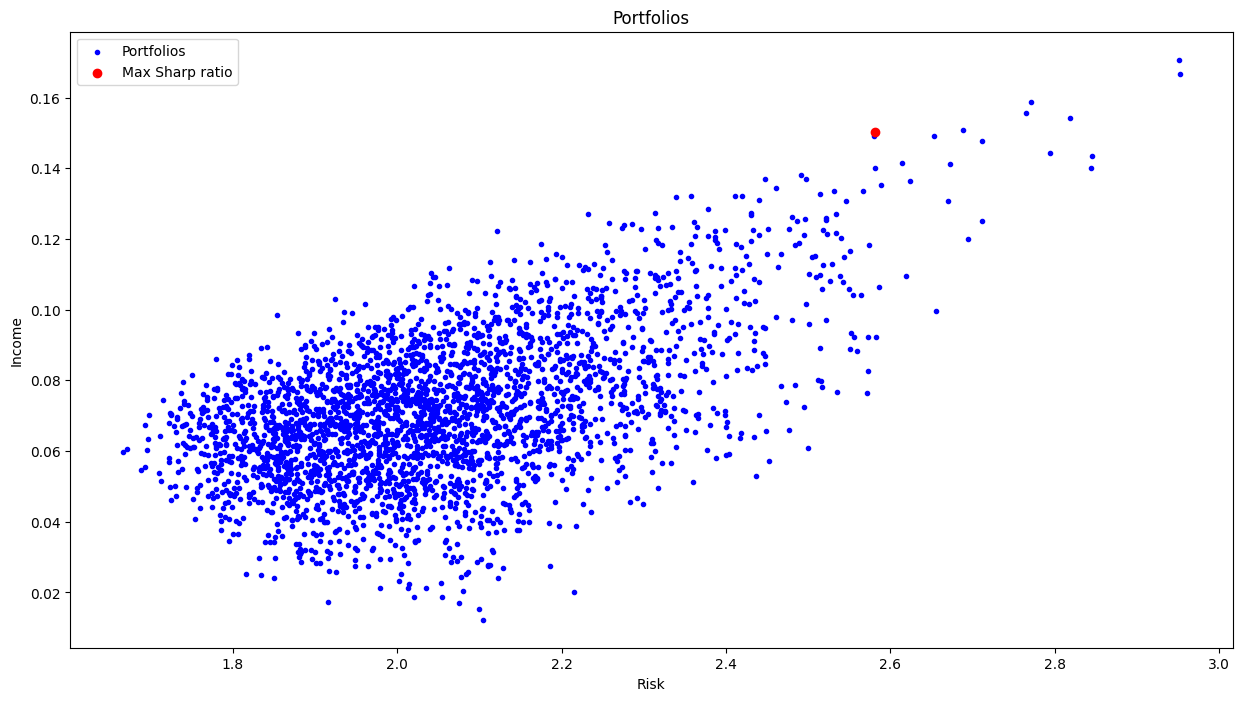

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

scatter = ax.scatter(risk * 100, income * 100, c="b", marker=".", label="Portfolios")

max_sharpe_idx = np.argmax(income / risk)
max_sharpe_risk, max_sharpe_income = risk[max_sharpe_idx] * 100, income[max_sharpe_idx] * 100
ax.scatter(max_sharpe_risk, max_sharpe_income, c="r", marker="o", label="Max Sharp ratio")

ax.set_xlabel("Risk")
ax.set_ylabel("Income")
ax.set_title("Portfolios")
ax.legend()

plt.show()


In [ ]:
import plotly.express as px

# Create a DataFrame for the portfolios
portfolio_df = pd.DataFrame({
    'Risk': risk * 100,
    'Income': income * 100,
})

max_sharpe_idx = np.argmax(income / risk)

fig = px.scatter(
    portfolio_df,
    x='Risk',
    y='Income',
    labels={'Risk': 'Risk', 'Income': 'Income'},
    title='Portfolios',
    hover_name=portfolio_df.index,
)

fig.add_trace(go.Scatter(
    x=[portfolio_df['Risk'][max_sharpe_idx]],
    y=[portfolio_df['Income'][max_sharpe_idx]],
    mode='markers+text',
    text=['Max Sharp ratio'],
    marker=dict(color='red', size=12),
    textposition='top center',
))

# Customization
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
)

fig.show()


In [ ]:
# Calculate MaxSharpRatio
MaxSharpRatio = np.argmax(income / risk)

best_port = portfolio[MaxSharpRatio]

[print(f"{tickers[i]}: {best_port[i]}") for i in range(len(tickers))]


GOOG: 0.058781194526008315
AMZN: 0.0394599809477514
AMD: 0.0414790058659807
META: 0.002826184309141586
INTC: 0.006046547320224429
AAPL: 0.12792122483547516
NVDA: 0.5943532803832189
MSFT: 0.12913258181219972


[None, None, None, None, None, None, None, None]

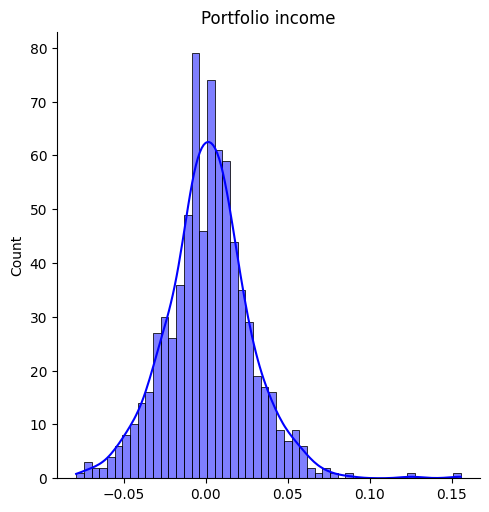

In [ ]:
import seaborn as sns

# Calculate the income of the best portfolio
best_portfolio_income = np.dot(stock_returns, portfolio[MaxSharpRatio])

# Plot the distribution using Seaborn
sns.displot(best_portfolio_income, bins=50, color='blue', kde=True)
plt.title('Portfolio income')
plt.show()


In [ ]:
standard_dev = RiskPortfolio(best_port)
mean = IncomePortfolio(best_port)

In [ ]:
from scipy.stats import norm
from tabulate import tabulate

# Calculate VaR for different confidence levels
confidence_levels = [0.1, 0.05, 0.01]
var_values = {level: norm.ppf(level, mean, standard_dev) for level in confidence_levels}

# Print VaR values using tabulate
headers = ['Confidence level', 'Value at Risk']
var_table = [[f'{level * 100}%', var_values[level]] for level in confidence_levels]
print(tabulate(var_table, headers=headers))


Confidence level      Value at Risk
------------------  ---------------
10.0%                    -0.0315701
5.0%                     -0.0409461
1.0%                     -0.0585338


In [ ]:
import numpy as np
import plotly.graph_objects as go

# var_90 and days earlier in your code
var_90 = 123.45
days = 30  # number of days for VaR calculation


var_array = [np.round(var_90 * np.sqrt(x), 2) for x in range(1, days + 1)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, days + 1)), y=var_array, mode='lines', marker=dict(color='blue')))
fig.update_layout(
    xaxis_title='Days',
    yaxis_title='Portfolio loss',
    title='VaR 90%',
    title_x=0.5,
    template='plotly_dark'
)
fig.show()


In [ ]:
import numpy as np

capital = 100000
option_share = []
shares = np.multiply(best_port, capital)

deltas = np.array([options_put[ticker]['Delta'].iloc[int(options_put[ticker].shape[0] // 1.5)] for ticker in tickers])

option_share = -shares / deltas

option_share = option_share.tolist()

option_share


[9748.125128691263,
 4486.127893104979,
 4939.741082050817,
 385.985292152634,
 726.4865217138566,
 18740.29077578013,
 60834.52204536529,
 14669.15617541744]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

option_share = np.array(option_share).reshape(-1, 1)  # Reshape to 2D array for sklearn
deltas = np.array(deltas).reshape(-1, 1)

model = LinearRegression()

# Fit the model
model.fit(deltas, option_share)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Linear Regression Equation: option_share = {slope:.2f} * deltas + {intercept:.2f}")


Linear Regression Equation: option_share = -76983.95 * deltas + -47527.79


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

option_share = np.array(option_share).reshape(-1, 1)
deltas = np.array(deltas).reshape(-1, 1)

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Ridge regression model
ridge = Ridge()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=min(8, len(deltas)))
grid_search.fit(deltas, option_share)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Best Alpha: {best_alpha}")
print(f"Best Model: {best_model}")



Best Alpha: 0.1
Best Model: Ridge(alpha=0.1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

In [ ]:
import plotly.graph_objects as go

option_share = np.array(option_share).reshape(-1, 1)  # Reshape to 2D array for sklearn
deltas = np.array(deltas).reshape(-1, 1)

model = LinearRegression()
model.fit(deltas, option_share)

predicted_option_share = model.predict(deltas)

scatter = go.Scatter(x=df['Deltas'], y=df['Option Share'], mode='markers', name='Data Points')

line = go.Scatter(x=df['Deltas'], y=predicted_option_share.flatten(), mode='lines', name='Linear Regression Line')

fig = go.Figure(data=[scatter, line])

fig.update_layout(
    title='Linear Regression',
    xaxis_title='Deltas',
    yaxis_title='Option Share'
)

fig.show()


In [ ]:
import pandas as pd
stock_data = pd.read_csv('stock_data.csv')

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Feature Engineering
# 1. Lag Features for each stock
stock_columns = ['GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT']
for stock_column in stock_columns:
    for i in range(1, 4):  # Consider lag features for the past 3 days
        stock_data[f'{stock_column}_lag_{i}'] = stock_data[stock_column].shift(i)

# 2. Rolling Averages for each stock
for stock_column in stock_columns:
    stock_data[f'{stock_column}_rolling_mean'] = stock_data[stock_column].rolling(window=3).mean()

# 3. Day of Week and Month features
stock_data['day_of_week'] = stock_data['Date'].dt.dayofweek
stock_data['month'] = stock_data['Date'].dt.month

stock_data.dropna(inplace=True)

print(stock_data)


          Date  GOOG  AMZN  AMD  META  INTC  AAPL  NVDA  MSFT  GOOG_lag_1  \
3   2020-10-27    80   164   78   283    41   114   133   207        79.0   
4   2020-10-28    75   158   76   267    40   109   125   197        80.0   
5   2020-10-29    78   160   78   280    40   113   129   199        75.0   
6   2020-10-30    81   151   75   263    40   106   125   197        78.0   
7   2020-11-02    81   150   74   261    40   106   125   196        81.0   
..         ...   ...   ...  ...   ...   ...   ...   ...   ...         ...   
749 2023-10-16   140   132  106   321    36   178   460   332       138.0   
750 2023-10-17   140   131  105   324    36   177   439   332       140.0   
751 2023-10-18   139   128  102   316    35   175   421   330       140.0   
752 2023-10-19   138   128  102   312    35   175   421   331       139.0   
753 2023-10-20   136   125  101   308    34   172   413   326       138.0   

     ...  GOOG_rolling_mean  AMZN_rolling_mean  AMD_rolling_mean  \
3    ..

In [55]:
import pandas as pd
import plotly.express as px

for stock_column in stock_columns:
    lag_columns = [f'{stock_column}_lag_{i}' for i in range(1, 4)]
    fig = px.line(stock_data, x='Date', y=lag_columns, title=f'Lag Features for {stock_column}')
    fig.show()

for stock_column in stock_columns:
    rolling_mean_column = f'{stock_column}_rolling_mean'
    fig = px.line(stock_data, x='Date', y=rolling_mean_column, title=f'Rolling Average for {stock_column}')
    fig.show()

fig = px.line(stock_data, x='Date', y='day_of_week', title='Day of Week')
fig.show()

fig = px.line(stock_data, x='Date', y='month', title='Month')
fig.show()


In [54]:
import pandas as pd

# Assuming you already have a DataFrame called stock_data with columns 'Date', 'GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT'

# Historical Volatility (for the last 10 days)
for stock_column in stock_columns:
    stock_data[f'{stock_column}_historical_volatility'] = stock_data[stock_column].rolling(window=10).std() * (252 ** 0.5)  # 252 trading days in a year

# Price Rate of Change (for the last 5 days)
for stock_column in stock_columns:
    stock_data[f'{stock_column}_price_rate_of_change'] = stock_data[stock_column].pct_change(periods=5) * 100  # Percentage change

# Exponential Moving Averages (EMA)
ema_periods = [10, 50]
for period in ema_periods:
    for stock_column in stock_columns:
        stock_data[f'{stock_column}_ema_{period}'] = stock_data[stock_column].ewm(span=period, min_periods=period, adjust=False).mean()

# Bollinger Bands (for the last 20 days with 2 standard deviations)
bollinger_window = 20
for stock_column in stock_columns:
    stock_data[f'{stock_column}_bollinger_upper'] = stock_data[stock_column].rolling(window=bollinger_window).mean() + 2 * stock_data[stock_column].rolling(window=bollinger_window).std()
    stock_data[f'{stock_column}_bollinger_lower'] = stock_data[stock_column].rolling(window=bollinger_window).mean() - 2 * stock_data[stock_column].rolling(window=bollinger_window).std()

# Advance-Decline Ratio (for the last 10 days)
stock_data['advance_decline_ratio'] = stock_data[stock_columns].apply(lambda row: sum(row > row.shift()) / sum(row < row.shift()), axis=1)

# New Highs/New Lows (for the last 10 days)
stock_data['new_highs'] = stock_data[stock_columns].apply(lambda row: sum(row > row.shift()), axis=1)
stock_data['new_lows'] = stock_data[stock_columns].apply(lambda row: sum(row < row.shift()), axis=1)

# Extract Day of Month and Quarter (assuming Date column is already in datetime format)
stock_data['day_of_month'] = stock_data['Date'].dt.day
stock_data['quarter'] = stock_data['Date'].dt.quarter

# Calculate Days Since Last High/Low (for each stock)
for stock_column in stock_columns:
    high_mask = stock_data[stock_column] > stock_data[stock_column].shift()
    low_mask = stock_data[stock_column] < stock_data[stock_column].shift()

    stock_data[f'days_since_last_high_{stock_column}'] = high_mask.groupby((high_mask != high_mask.shift()).cumsum()).cumsum().astype(int)
    stock_data[f'days_since_last_low_{stock_column}'] = low_mask.groupby((low_mask != low_mask.shift()).cumsum()).cumsum().astype(int)

print(stock_data)


          Date  GOOG  AMZN  AMD  META  INTC  AAPL  NVDA  MSFT  GOOG_lag_1  \
3   2020-10-27    80   164   78   283    41   114   133   207        79.0   
4   2020-10-28    75   158   76   267    40   109   125   197        80.0   
5   2020-10-29    78   160   78   280    40   113   129   199        75.0   
6   2020-10-30    81   151   75   263    40   106   125   197        78.0   
7   2020-11-02    81   150   74   261    40   106   125   196        81.0   
..         ...   ...   ...  ...   ...   ...   ...   ...   ...         ...   
749 2023-10-16   140   132  106   321    36   178   460   332       138.0   
750 2023-10-17   140   131  105   324    36   177   439   332       140.0   
751 2023-10-18   139   128  102   316    35   175   421   330       140.0   
752 2023-10-19   138   128  102   312    35   175   421   331       139.0   
753 2023-10-20   136   125  101   308    34   172   413   326       138.0   

     ...  days_since_last_high_META  days_since_last_low_META  \
3    ...  

In [56]:
import plotly.express as px

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=f'{stock_column}_historical_volatility', title=f'Historical Volatility for {stock_column}')
    fig.show()

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=f'{stock_column}_price_rate_of_change', title=f'Price Rate of Change for {stock_column}')
    fig.show()


for period in ema_periods:
    for stock_column in stock_columns:
        fig = px.line(stock_data, x='Date', y=f'{stock_column}_ema_{period}', title=f'EMA-{period} for {stock_column}')
        fig.show()

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=[f'{stock_column}_bollinger_upper', f'{stock_column}_bollinger_lower'],
                  title=f'Bollinger Bands for {stock_column}')
    fig.show()

fig = px.line(stock_data, x='Date', y='advance_decline_ratio', title='Advance-Decline Ratio')
fig.show()


fig = px.line(stock_data, x='Date', y=['new_highs', 'new_lows'], title='New Highs and New Lows')
fig.show()

for stock_column in stock_columns:
    fig_high = px.line(stock_data, x='Date', y=f'days_since_last_high_{stock_column}', title=f'Days Since Last High for {stock_column}')
    fig_high.show()

    fig_low = px.line(stock_data, x='Date', y=f'days_since_last_low_{stock_column}', title=f'Days Since Last Low for {stock_column}')
    fig_low.show()


In [59]:
print(stock_data.columns)


Index(['Date', 'GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT',
       'GOOG_lag_1', 'GOOG_lag_2', 'GOOG_lag_3', 'GOOG_rolling_mean',
       'AMZN_lag_1', 'AMZN_lag_2', 'AMZN_lag_3', 'AMZN_rolling_mean',
       'AMD_lag_1', 'AMD_lag_2', 'AMD_lag_3', 'AMD_rolling_mean', 'META_lag_1',
       'META_lag_2', 'META_lag_3', 'META_rolling_mean', 'INTC_lag_1',
       'INTC_lag_2', 'INTC_lag_3', 'INTC_rolling_mean', 'AAPL_lag_1',
       'AAPL_lag_2', 'AAPL_lag_3', 'AAPL_rolling_mean', 'NVDA_lag_1',
       'NVDA_lag_2', 'NVDA_lag_3', 'NVDA_rolling_mean', 'MSFT_lag_1',
       'MSFT_lag_2', 'MSFT_lag_3', 'MSFT_rolling_mean', 'day_of_week',
       'month'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_columns = ['GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT']

# Feature Engineering
for stock_column in stock_columns:
    for i in range(1, 4):  # Consider lag features for the past 3 days
        stock_data[f'{stock_column}_lag_{i}'] = stock_data[stock_column].shift(i)
    stock_data[f'{stock_column}_rolling_mean'] = stock_data[stock_column].rolling(window=3).mean()

stock_data['day_of_week'] = stock_data['Date'].dt.dayofweek
stock_data['month'] = stock_data['Date'].dt.month
stock_data.dropna(inplace=True)

# Define features and target variable
selected_features = [f'{stock_column}_lag_{i}' for stock_column in stock_columns for i in range(1, 4)]
selected_features += [f'{stock_column}_rolling_mean' for stock_column in stock_columns]
selected_features += ['day_of_week', 'month']
target_column = 'option_share'

X = stock_data[selected_features]
y = stock_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: RMSE: {np.mean(rmse_scores):.2f} (+/- {np.std(rmse_scores):.2f})")

# Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_poly_scaled, y_train)

print("Best Ridge Regression Model:")
print(f"Best Alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Best RMSE: {-ridge_grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = ridge_grid_search.best_estimator_
X_test_poly_scaled_best = scaler.transform(poly.transform(X_test[selected_features]))
predictions = best_model.predict(X_test_poly_scaled_best)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE for Best Ridge Regression Model: {test_rmse:.2f}")
